In [74]:
import pandas as pd

df=pd.read_csv('advertising.csv')

In [75]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [76]:
df.shape

(200, 4)

In [77]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Correlation among the variables')

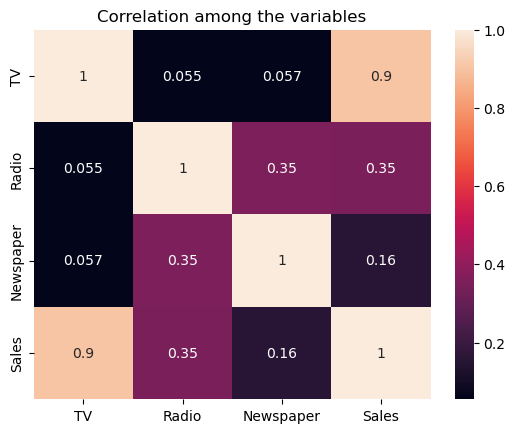

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.title('Correlation among the variables')

In [80]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

preprocess=Pipeline([
    ('scaler',StandardScaler())
])

model=Pipeline([
    ('preprocess',preprocess),
    ('regressor',RandomForestRegressor())
])

model.fit(X_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [89]:
y_pred=model.predict(X_test)
print(y_pred)

[17.509 22.486 20.024  6.411 22.895 13.896 22.622  9.741 17.17  16.879
  8.406 11.082 17.47   4.392 11.817 16.961  5.725 17.634 12.074 19.699
 19.906 13.525 10.847 21.861 11.212 10.797 22.714 12.265 11.739  5.289
 16.813 11.78  22.932  9.878 19.796 19.892 11.426 19.61  12.789  7.522
 12.684 17.396 10.045 10.526 16.96  10.072 11.406 13.573 12.562 12.877
 13.96  17.451  7.463  5.814 11.975 12.708 11.998 25.406  7.042 16.905]


In [110]:
from sklearn.metrics import r2_score
testing_acc={round(100*r2_score(y_test,y_pred),2)}

print(f'Testing Accuracy:',testing_acc)

Testing Accuracy: {94.12}
